# **HEART DISEASE PREDICTION**


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [ ]:
#Load the Heart Disease Dataset
heartdisease_df = pd.read_csv("/content/processed_cleveland.csv")

In [ ]:
#To check first 5 rows in the data set
heartdisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
print(heartdisease_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
heartdisease_df.thal.value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [ ]:
# Replace ? with NaN value
heartdisease_df.loc[heartdisease_df['thal']=='?', 'thal'] = np.NaN

In [ ]:
heartdisease_df.ca.value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [ ]:
# Replace ? with NaN value
heartdisease_df.loc[heartdisease_df['ca']=='?', 'ca'] = np.NaN

In [ ]:
# Replace NaN with median values
heartdisease_df=heartdisease_df.fillna(heartdisease_df.median())
# cast the columns to integer data type
heartdisease_df = heartdisease_df.astype(int)

In [ ]:
heartdisease_df.thal.value_counts()

3    168
7    117
6     18
Name: thal, dtype: int64

In [ ]:
heartdisease_df.ca.value_counts()

0    180
1     65
2     38
3     20
Name: ca, dtype: int64

In [ ]:
heartdisease_df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
heartdisease_df.loc[heartdisease_df['num']== 2, 'num'] = 1
heartdisease_df.loc[heartdisease_df['num']== 3, 'num'] = 1
heartdisease_df.loc[heartdisease_df['num']== 4, 'num'] = 1

#heartdisease_df = heartdisease_df.dropna()

# cast the columns to integer data type
#heartdisease_df = heartdisease_df.astype(int)

heartdisease_df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [ ]:
heartdisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0


In [ ]:
y=heartdisease_df.num.value_counts()
x=['No Disease','Disease']
fig=go.Figure(
    data=[go.Bar(x=x,y=y,text=y, textposition='auto',)],
                    layout=go.Layout(title=go.layout.Title(text='Num (Target) Variable (Heart Disease) Distribution')))
fig.update_xaxes(title_text='Num (Target)')
fig.update_yaxes(title_text='Number of Individuals')
fig.show()

In [ ]:
fig = px.histogram(heartdisease_df, x='age',color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Age')
fig.show()

In [ ]:
female=heartdisease_df.loc[heartdisease_df['sex']==0]
female_values=female.num.value_counts()
male=heartdisease_df.loc[heartdisease_df['sex']==1]
male_values=male.num.value_counts()
num=['No Disease','Disease']
fig = go.Figure(data=[
    go.Bar(name='female', x=female_values.index, y=female_values, text=female_values, textposition='auto'),
    go.Bar(name='male', x=male_values.index, y=male_values, text=male_values, textposition='auto'),
])
fig.update_xaxes(title_text='Num')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Sex According to Num Variable')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
cp=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic']
y1=heartdisease_df.loc[heartdisease_df['num']==0].cp.value_counts()
y2=heartdisease_df.loc[heartdisease_df['num']==1].cp.value_counts()
fig = go.Figure(data=[
    go.Bar(name='Disease', x=cp, y=y2),
    go.Bar(name='No Disease', x=cp, y=y1)
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text='Chest Pain Type')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Num (Target) Variable According to Chest Pain Type')
fig.show()

In [ ]:
dis=heartdisease_df.loc[heartdisease_df['num']==1]
dis_values=dis.fbs.value_counts()
nodis=heartdisease_df.loc[heartdisease_df['num']==0]
nodis_values=nodis.fbs.value_counts()
num=['No Disease','Disease']
d=['False','True']
fig = go.Figure(data=[
    go.Bar(name='Disease', x=d, y=dis_values, text=dis_values, textposition='auto'),
    go.Bar(name='No Disease', x=d, y=nodis_values, text=nodis_values, textposition='auto'),
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text='Fasting Blood Sugar (fbs < 120 mg/dl or > 120 mg/dl)')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Num Variable According to Fasting Blood Sugar')
fig.show()

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

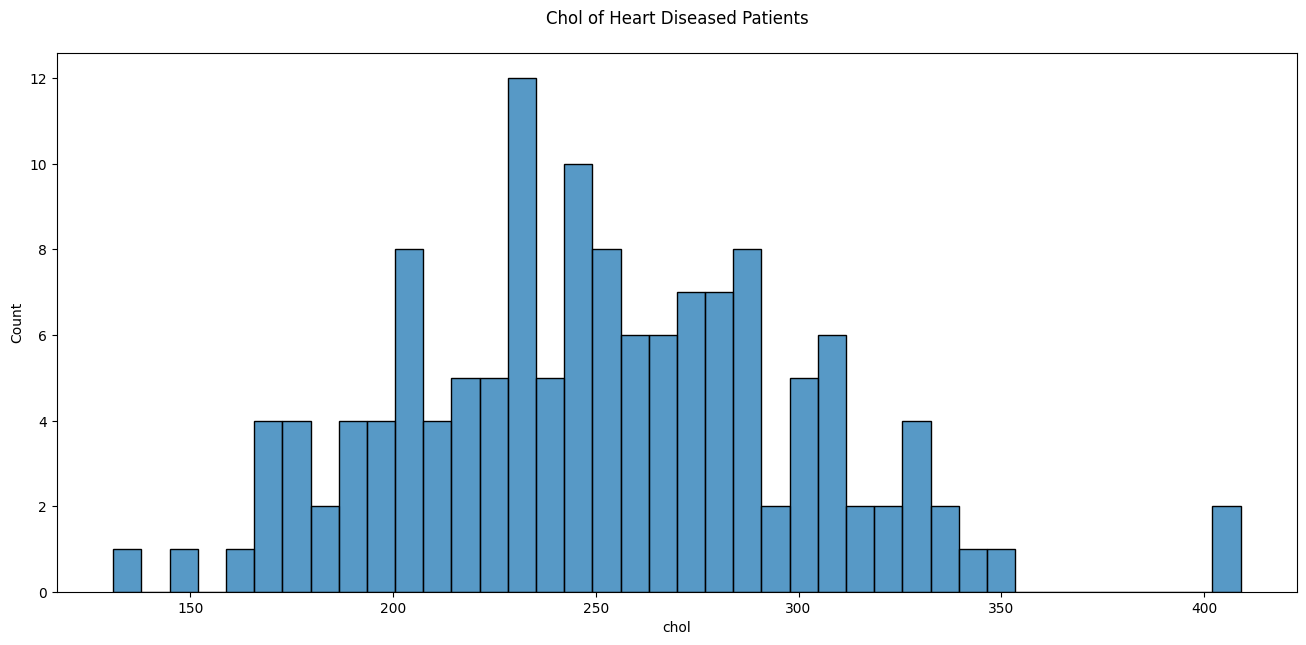

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(heartdisease_df[heartdisease_df['num']==1]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

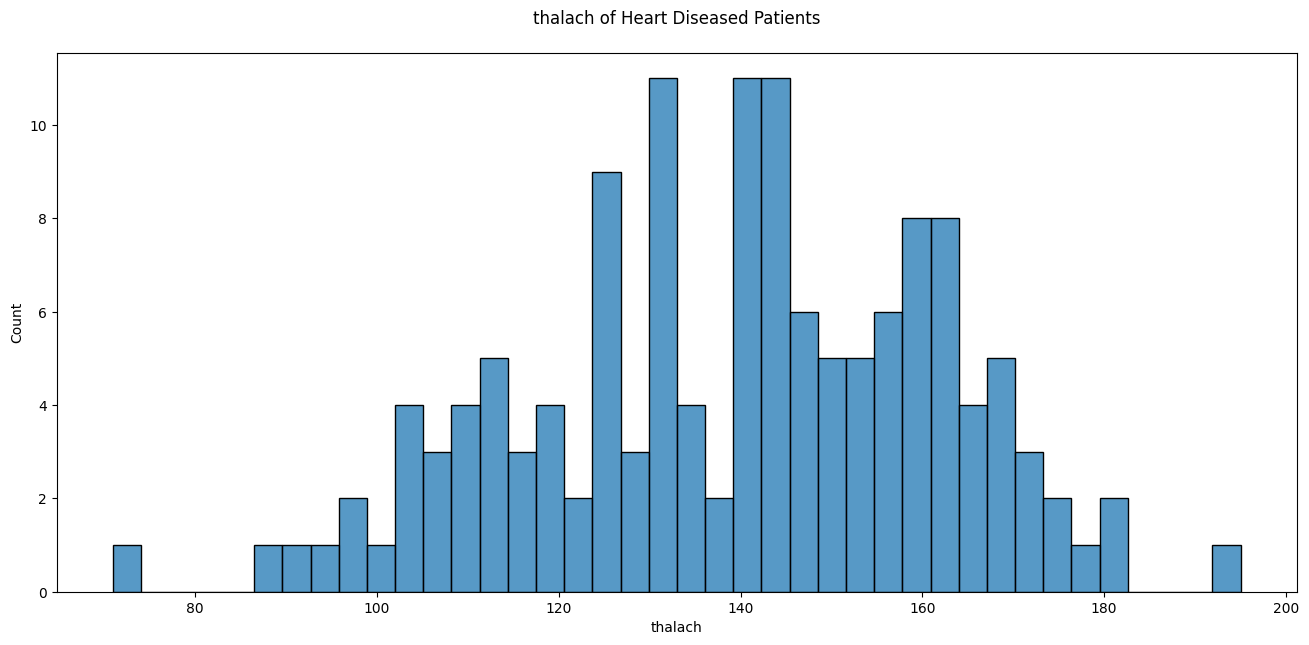

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(heartdisease_df[heartdisease_df['num']==1]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

In [ ]:
df1 = heartdisease_df[heartdisease_df['num'] == 1 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]
#num 1 - people with heart disease
pal = sns.light_palette("blue", as_cmap=True)


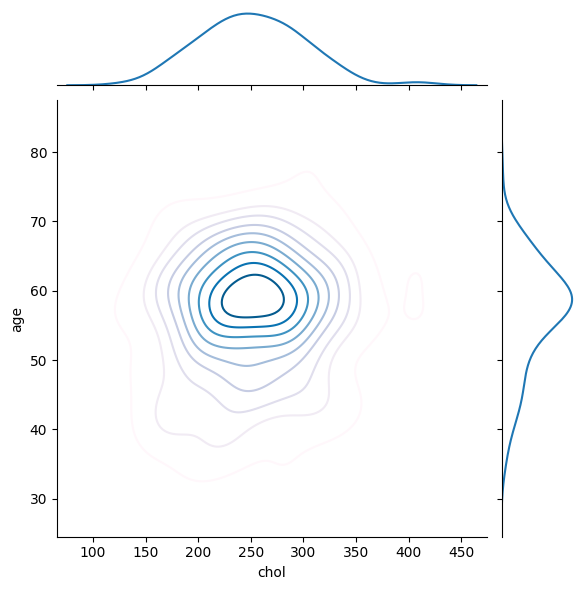

In [ ]:
sns.jointplot(data=df1,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

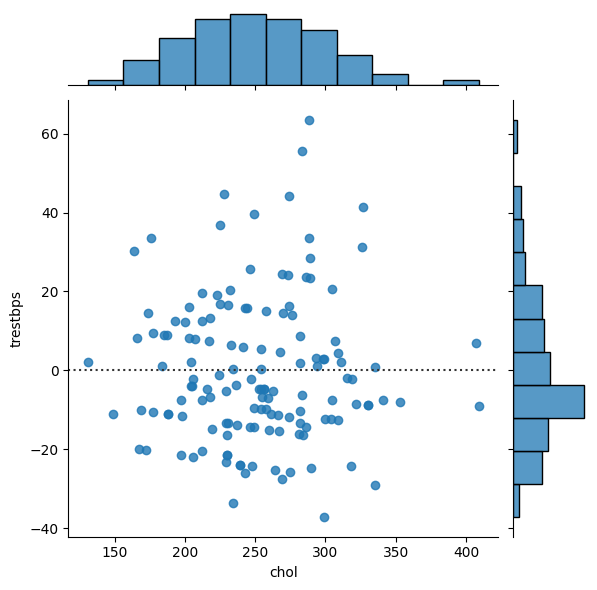

In [ ]:
sns.jointplot(data=df1,
              x='chol',
              y='trestbps',
              kind='resid',

              )

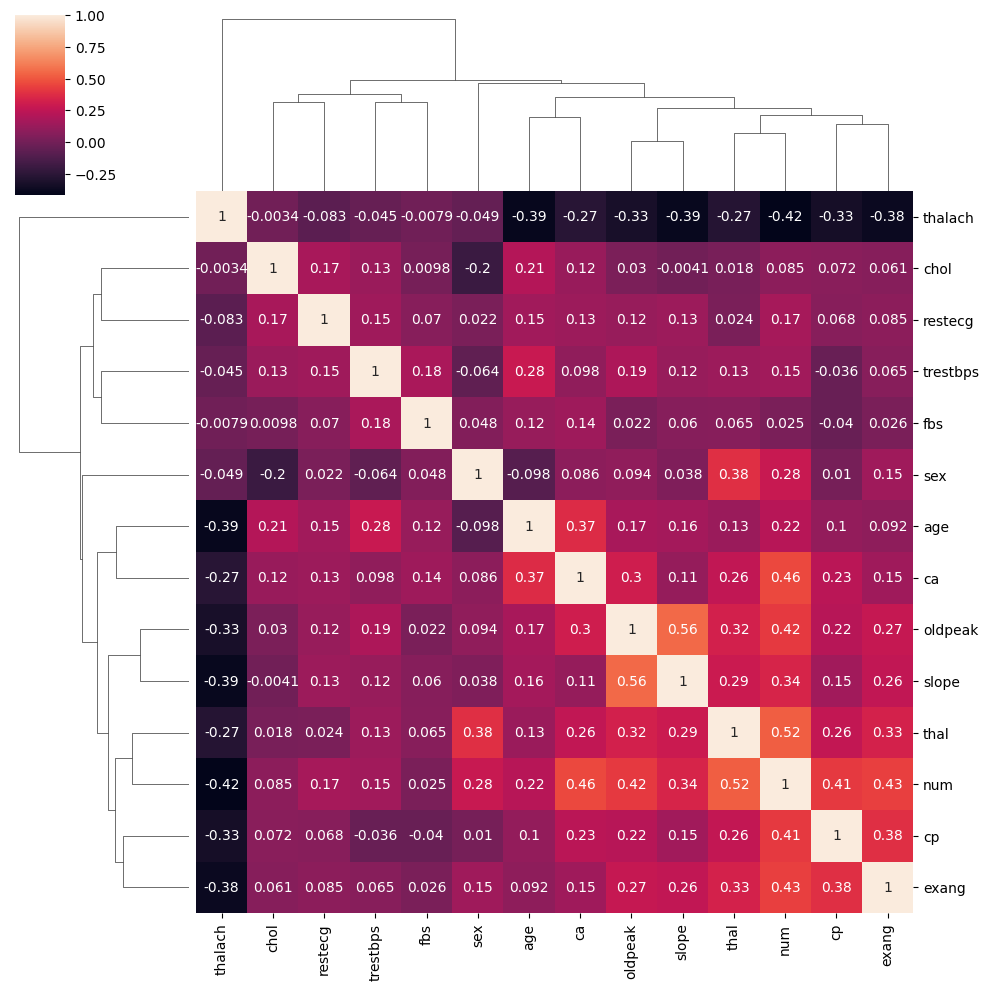

In [ ]:
sns.clustermap(heartdisease_df.corr(),annot=True)

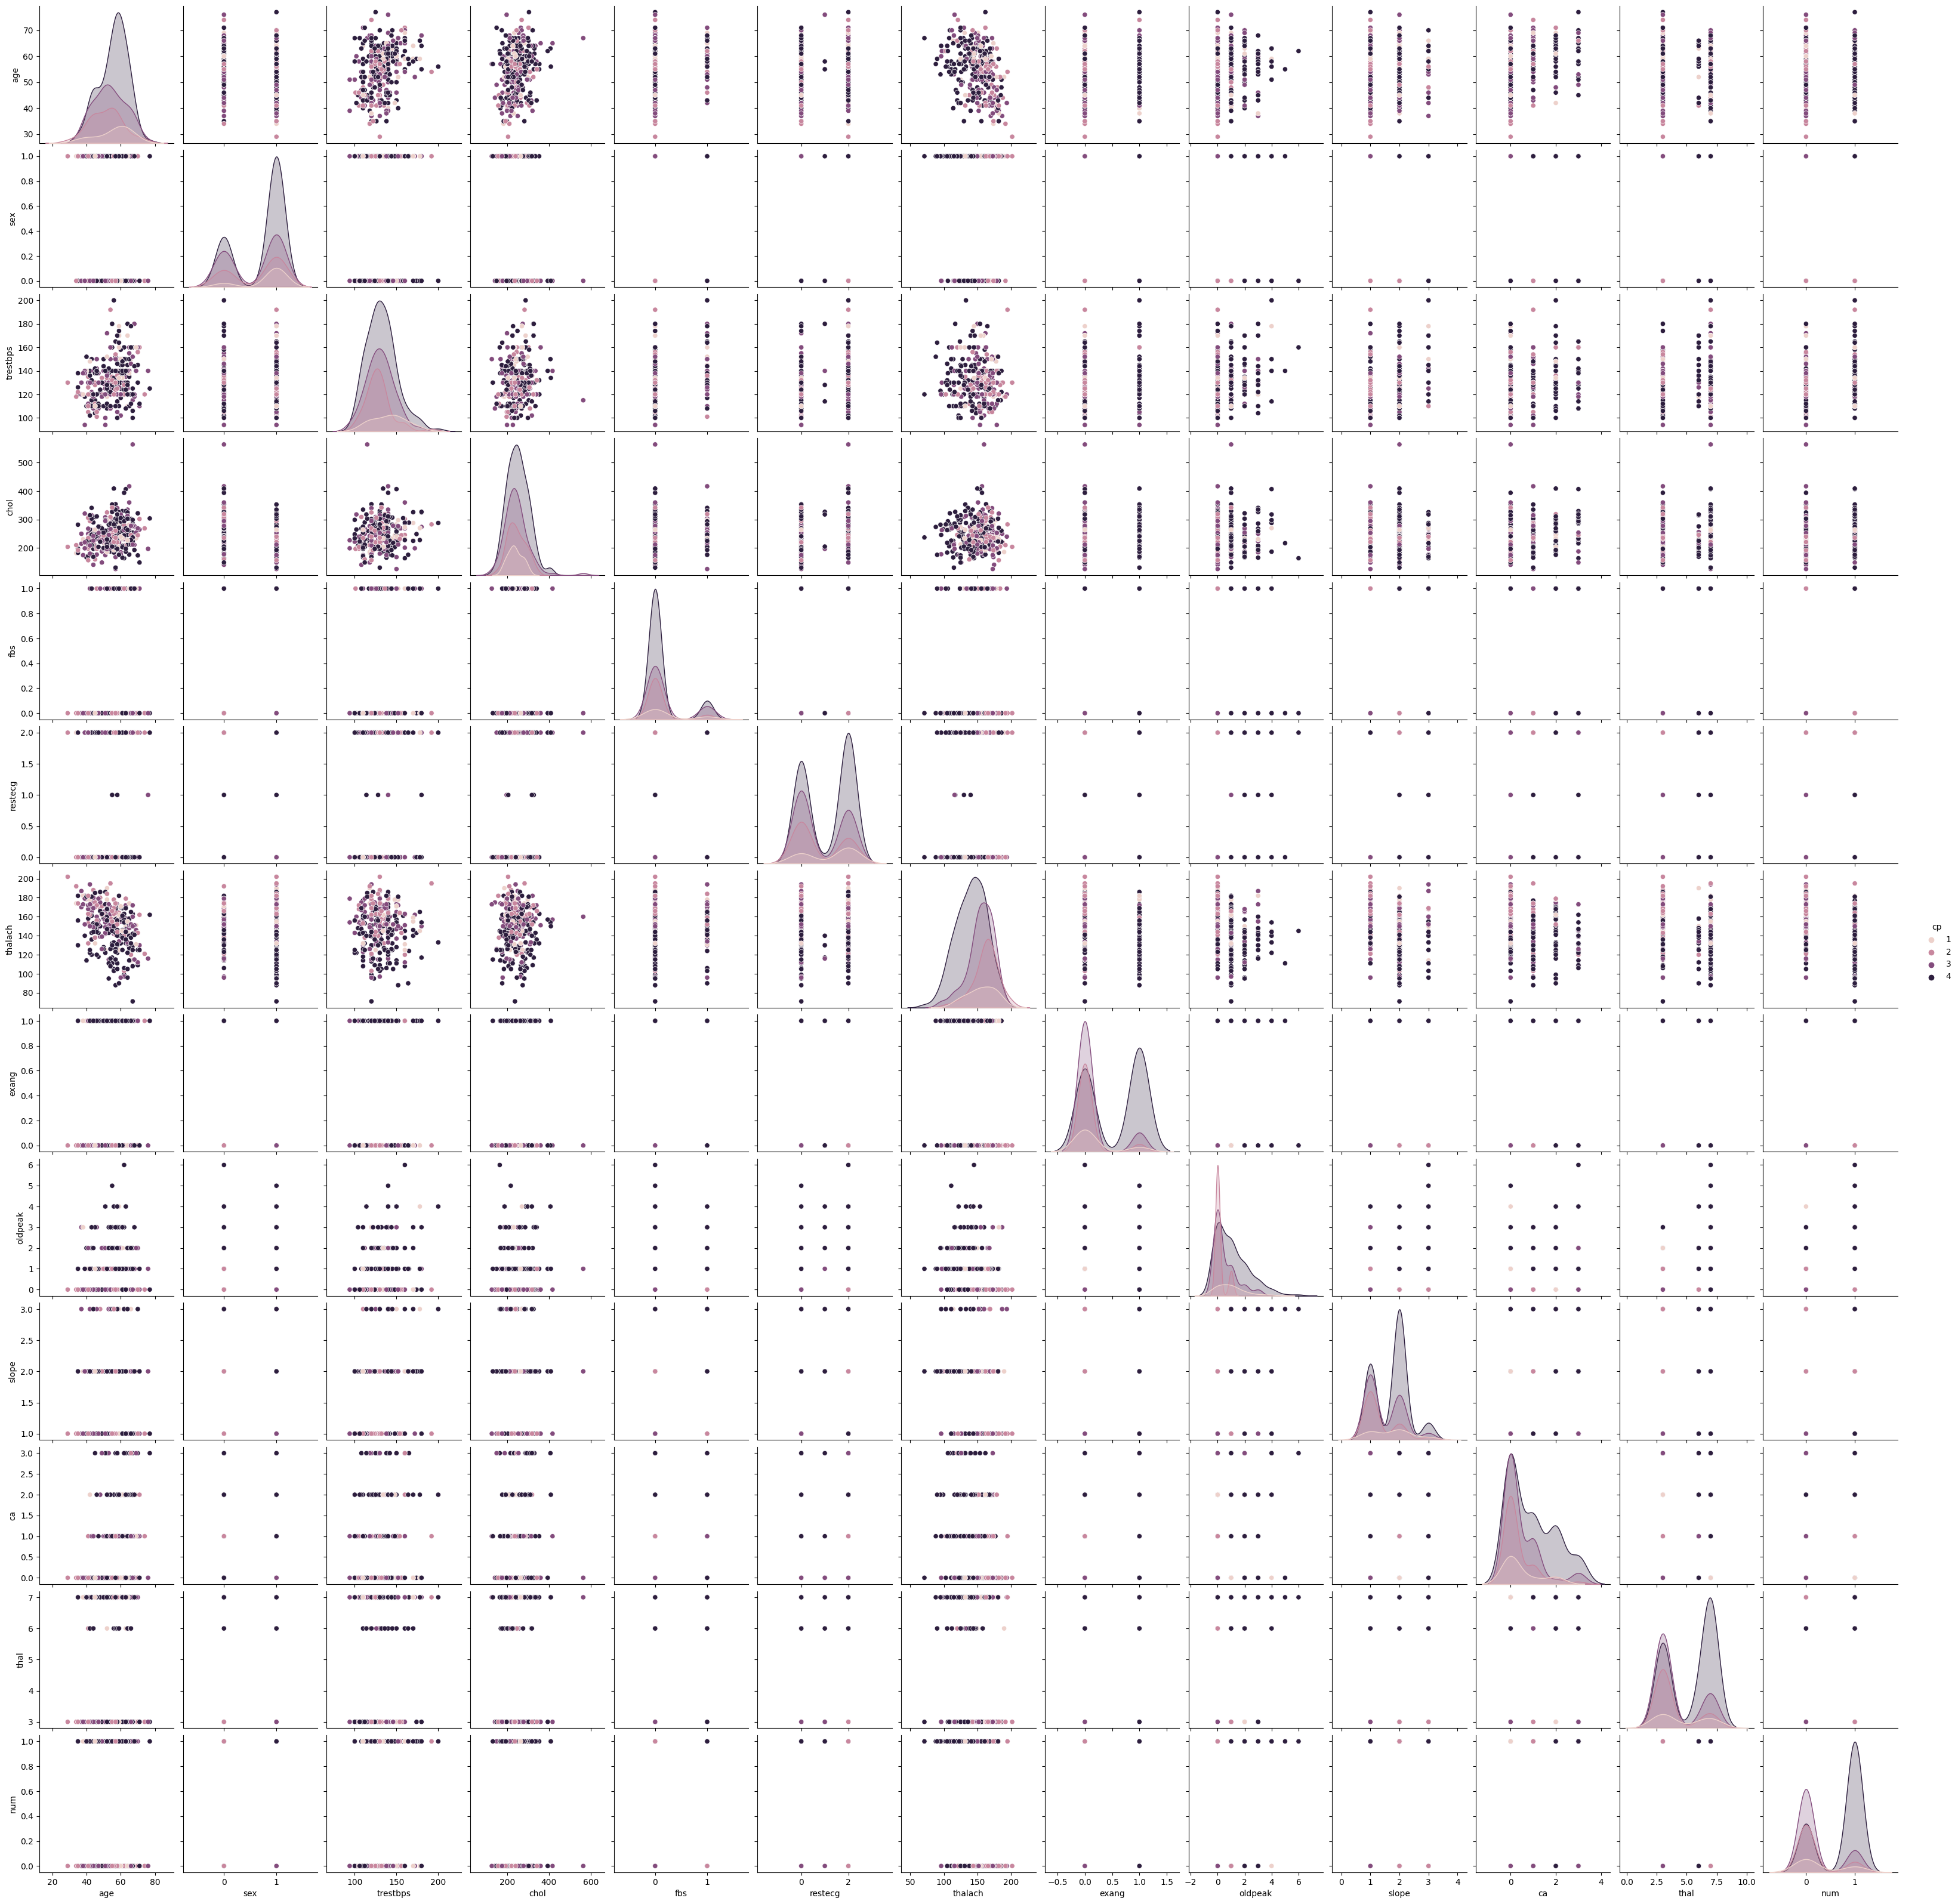

In [ ]:
sns.pairplot(heartdisease_df,hue='cp')

In [ ]:
filename = 'cleaned_data.csv'
heartdisease_df.to_csv(filename, index=False)

# **MODELLING**

In [ ]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing necessary libraries for Logistic Regression
from collections import Counter
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [ ]:
#Load the Cleaned Heart Disease Dataset
cleaned_data = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
#train-test-split our data in order to evaluate our model and scaling our data normalizes the range of values in our independent variables.

y = cleaned_data["num"]
X = cleaned_data.drop('num',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#sklearn’s DummyClassifier to determine our baseline accuracy

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.4262295081967213

In [ ]:
#54.09% baseline accuracy

**LOGISTIC REGRESSION**

In [ ]:
#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.7868852459016393
Test F1 score:  0.7234042553191489
confusion matrix
[[31  4]
 [ 9 17]]


              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



**K-Nearest Neighbor**

In [ ]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.8032786885245902
Test F1 score:  0.7500000000000001
confusion matrix
[[31  4]
 [ 8 18]]


              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.82      0.69      0.75        26

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



**Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.7868852459016393
Test F1 score:  0.7346938775510203
confusion matrix
[[30  5]
 [ 8 18]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.78      0.69      0.73        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



**Decision Tree**

In [ ]:
# INSATNTIATE DECISION TREE MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_f1_score=metrics.f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Test Accuracy score:  0.7377049180327869
Test F1 score:  0.7037037037037038
confusion matrix
[[26  9]
 [ 7 19]]


              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.68      0.73      0.70        26

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.74      0.74      0.74        61



**Random Forest**

In [ ]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.7540983606557377
Test F1 score:  0.6808510638297872
confusion matrix
[[30  5]
 [10 16]]


              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.76      0.62      0.68        26

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



**Extreme Gradient Boosting**

In [ ]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, seed=25)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = metrics.f1_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# Compute the accuracy: accuracy
# checking accuracy
print('Test Accuracy score: ',xgb_acc_score)
print('Test F1 score: ', xgb_f1_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

Test Accuracy score:  0.7377049180327869
Test F1 score:  0.68
confusion matrix
[[28  7]
 [ 9 17]]


              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.71      0.65      0.68        26

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



**Support Vector Classifier**

In [ ]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.7868852459016393
Test F1 score:  0.7234042553191489
confusion matrix
[[31  4]
 [ 9 17]]


Accuracy of Support Vector Classifier: 0.7868852459016393 

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



**Comapring all**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'], 'Accuracy': [lr_acc_score,
                    rfc_acc_score,xgb_acc_score,knn_acc_score,tree_acc_score,nb_acc_score, svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.786885
1,Random Forest,0.754098
2,Extreme Gradient Boost,0.737705
3,K-Nearest Neighbour,0.803279
4,Decision Tree,0.737705
5,Naive Bayes,0.786885
6,Support Vector Classifier,0.786885


In [ ]:
scv=StackingCVClassifier(classifiers=[knn,logreg,nb],meta_classifier=nb,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[31  4]
 [ 8 18]]


Accuracy of StackingCVClassifier: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.82      0.69      0.75        26

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
# Define the features (X) and num (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knnmodel = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knnmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knnmodel.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 68.85%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import accuracy_score

# Define the features (X) and num (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
LogRegModel = LogisticRegression()

# Train the model on the training set
LogRegModel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = LogRegModel.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.16%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and target variable (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Naive Bayes classifier
nbmodel = GaussianNB()

# Train the model
nbmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nbmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 83.61%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and target variable (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Decision Tree classifier
dtcmodel = DecisionTreeClassifier()

# Train the model
dtcmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtcmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.77%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest classifier
rfcmodel = RandomForestClassifier()

# Train the model
rfcmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfcmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 88.52%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and target variable (y)
X = cleaned_data.drop('num', axis=1)
y = cleaned_data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBoost classifier
xgbmodel = xgb.XGBClassifier()

# Train the model
xgbmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgbmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 83.61%


In [ ]:
pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [ ]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [ ]:
patients = X_test.iloc[3,:].astype(float)
patients_target = y_test.iloc[3:4]
print('Target : ',int(patients_target))
patient_analysis(rfcmodel, patients)

Target :  1


In [ ]:
patients = X_test.iloc[33,:].astype(float)
patients_target = y_test.iloc[33:34]
print('Target : ',int(patients_target))
patient_analysis(rfcmodel, patients)

Target :  0


In [ ]:
# Create a new dataframe for the new patient
new_patient = pd.DataFrame({
    'age': [35],
    'sex': [1],
    'cp': [2],
    'trestbps': [130],
    'chol': [250],
    'fbs': [0],
    'restecg': [1],
    'thalach': [187],
    'exang': [0],
    'oldpeak': [2.5],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Use the trained model to make a prediction for the new patient
prediction = LogRegModel.predict(new_patient)

# Print the predicted target value (0 = no heart disease, 1 = heart disease)
print('Prediction:', prediction[0])

Prediction: 0


In [ ]:
# Create a new dataframe for the new patient
new_patient = pd.DataFrame({
    'age': [59],
    'sex': [1],
    'cp': [4],
    'trestbps': [70],
    'chol': [140],
    'fbs': [0],
    'restecg': [0],
    'thalach': [84],
    'exang': [0],
    'oldpeak': [1.5],
    'slope': [2],
    'ca': [2],
    'thal': [3]
})

# Use the trained model to make a prediction for the new patient
prediction = LogRegModel.predict(new_patient)

# Print the predicted target value (0 = no heart disease, 1 = heart disease)
print('Prediction:', prediction[0])

Prediction: 1


In [ ]:
#import joblib

# Train your model
#LogRegModel.fit(X_train, y_train)

# Save the trained model
#joblib.dump(LogRegModel, 'heart_disease_model.pkl')


In [ ]:
import pickle

# Save the model
pickle.dump(LogRegModel, open('heart_disease_model_ickle.pkl', 'wb'))